     |████████████████████████████████| 2.3 MB 7.8 MB/s 


Saving 3100.ab1 to 3100.ab1
User uploaded file "3100.ab1" with length 209224 bytes


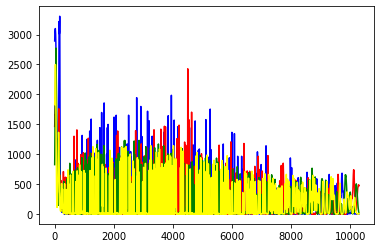

In [ ]:
# 
# Importando bibliotecas necessarias
#

import sys, os
!pip3 install biopython
from Bio import SeqIO
from Bio.Seq import Seq
from Bio import pairwise2
from collections import defaultdict
from google.colab import files
import matplotlib.pyplot as plt

#
# Upload do arquivo ab1
#

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  record = SeqIO.read(fn, "abi")
  channels = ["DATA9", "DATA10", "DATA11", "DATA12"]
  trace = defaultdict(list)
  for c in channels:
    trace[c] = record.annotations["abif_raw"][c]

#
# Preparando o gráfico
#

  plt.plot(trace["DATA9"], color="blue")
  plt.plot(trace["DATA10"], color="red")
  plt.plot(trace["DATA11"], color="green")
  plt.plot(trace["DATA12"], color="yellow")
  plt.show()


